# Julia Sets
- For any given complex function, Julia sets are the set of complex numbers that do not converge to any limit when a given mapping is repeatedly applied to them.
- For example: take the function $f(z) = z^{2} + c$
    - z is a complex number,  $z = x + iy$
    - c is some constant complex number
    - Get output f(z)
    - set z = f(z) and repeat
    - if this number does not converge, then the startpoint z belongs to the julia set of $f(z) = z^{2} + c$
    
- The Julia set image is by plotting the number of iterations before the particular initial value converges

In [1]:
### imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Function to create julia set image

In [2]:
def julia_set(complex_function, *args, max_iter=100, z_abs_lim=10):
    """ Create Julia set for some given function
    complex_function: function for which the Julia set will be made
    max_iter: max number of iterations before convergence assumed
    z_abs_lim: limit of values of z
    output: 500x500 image of Julia set"""
    
    ### number of pixels in image
    imwidth, imheight = 500, 500
    
    ### boundary distances
    window_x = [-1.5,1.5]
    width = window_x[1] - window_x[0]
    window_y = [-1.5,1.5]
    height = window_y[1] - window_y[0]

    z_abs_lim = 10

    julia = np.zeros((imwidth,imheight))

    for x in range(imwidth):
        for y in range(imheight):
            
            ## initialize complex number
            z = complex(x/imwidth * width + window_x[0],
                       y/imheight * height + window_y[0])
            
            ### initialize iteration at 0
            num_iter = 0
            
            ### check if z has converged to limit 
            while abs(z) < z_abs_lim and num_iter < max_iter:
                z = complex_function(z, c)
                num_iter+=1
            
            ### add to array
            julia[x,y] = (num_iter/max_iter)
            
    return julia

### Run for some complex function

In [3]:
c = complex(0.8,0.8)

def myfunc(z, c):
    return z**5+ c

Text(0.5, 1.0, 'Julia set for the function $z^5 + 0.8 + 0.8i$')

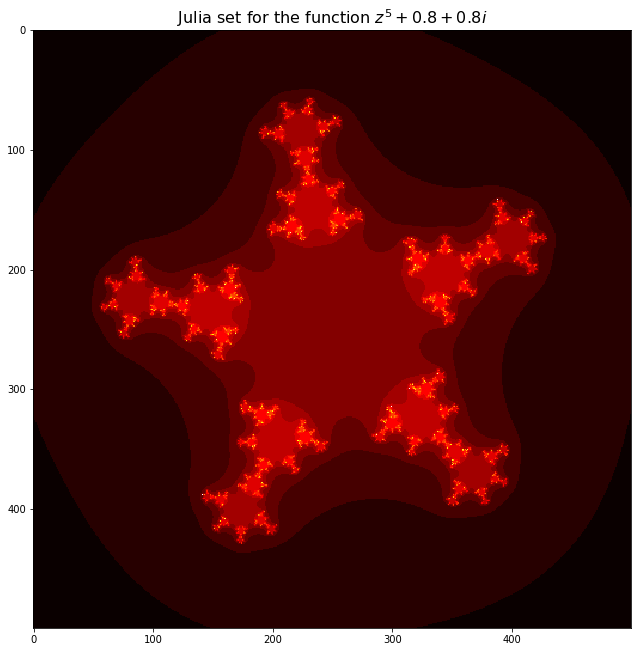

In [4]:
fig = plt.figure(figsize=(11,11))
julia = julia_set(myfunc)
plt.imshow(julia, interpolation='nearest',cmap=cm.hot)
plt.title(r"Julia set for the function $z^5 + 0.8 + 0.8i$", fontsize=16)

## Run for a varierty of functions, changing the value of c

In [5]:
def myfunc(z, c):
    return z**2 + c

In [6]:
picgrid = np.zeros((10,10,500,500))


for re in range(10):
    for im in range(10):
        
        c = complex(-1 + re/5,-1 +im/5)
        imwidth, imheight = 500, 500
        window_x = [-1.5,1.5]
        width = window_x[1] - window_x[0]
        window_y = [-1.5,1.5]
        height = window_y[1] - window_y[0]

        z_abs = 10
        max_iter= 100
            
        julia = julia_set(myfunc, c)
        
        picgrid[re,im] = julia

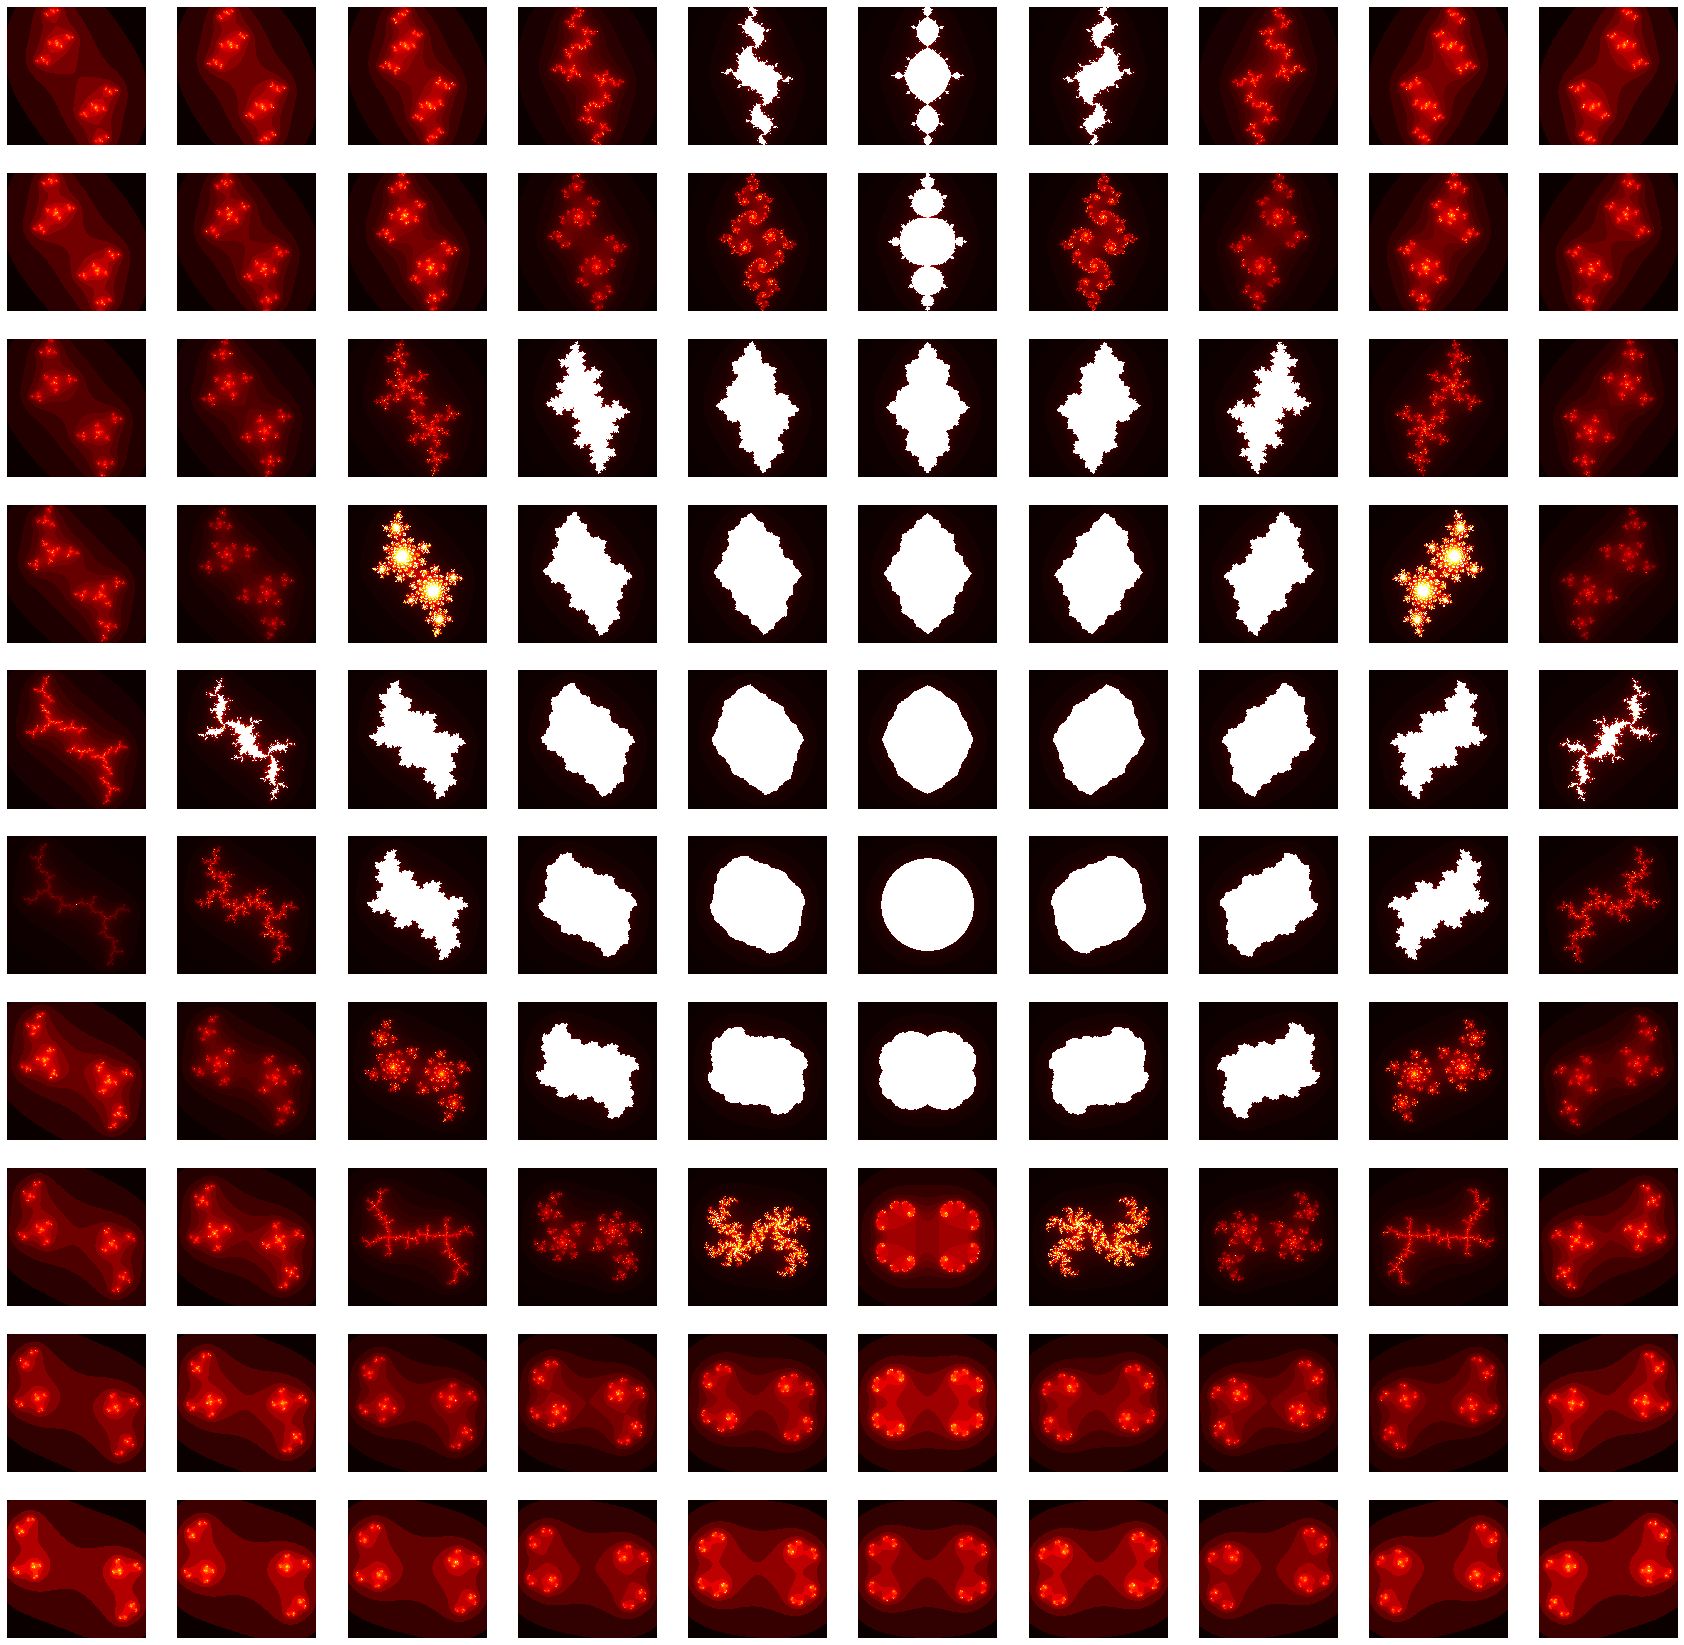

In [7]:
fig, ax = plt.subplots(10,10,figsize = (30,30))

for i in range(10):
    for j in range(10):
        a = picgrid[i,j]
        ax[i,j].set_axis_off()
        ax[i,j].imshow(a, interpolation='nearest',cmap=cm.hot)
        
plt.savefig('Julia_sets.jpg')

### View plot in more detail

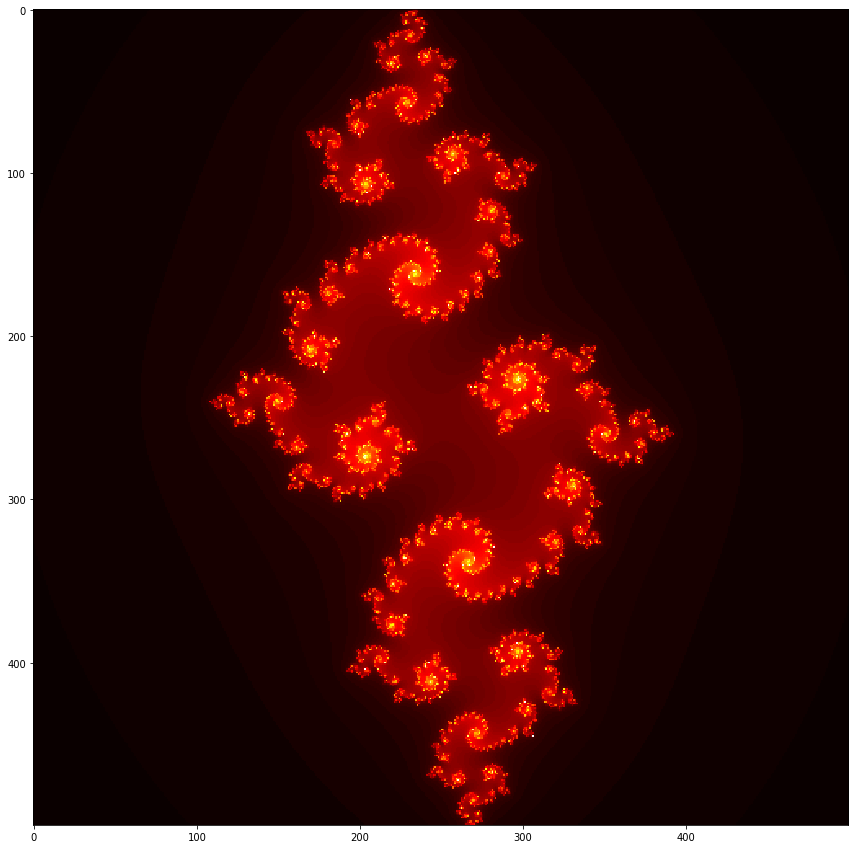

In [8]:
fig = plt.figure(figsize=(15,15))
plt.imshow(picgrid[1,4], interpolation='nearest',cmap=cm.hot)